# **Training Multiple Models on Titanic Dataset**

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## **Loading our dataset**

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## **Understanding our data**

In [4]:
print("Shape of the data :- ",data.shape)

Shape of the data :-  (891, 12)


In [5]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Pengelly, Mr. Frederick William",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## **Checking Null Values**

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
missing_values = data.isna().sum().sort_values(ascending=False)
missing_values

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:>

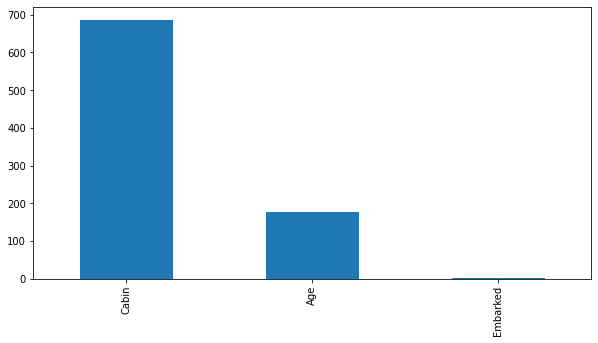

In [10]:
plt.figure(figsize=(10,5))
missing_values[missing_values != 0].plot.bar()

## **Visualizing our data**

In [11]:
def count_plot(feature):
    sns.countplot(x=feature,data=data)
    plt.show()
    print("\n")

In [12]:
columns = ['Survived','Pclass','Sex','SibSp','Embarked']

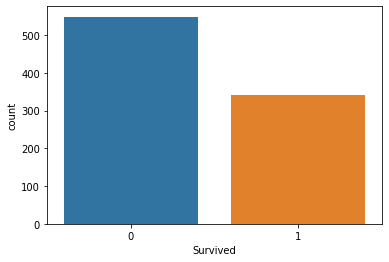

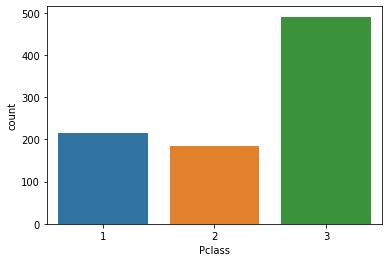

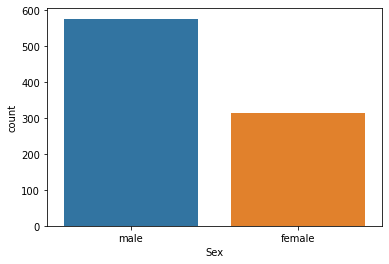

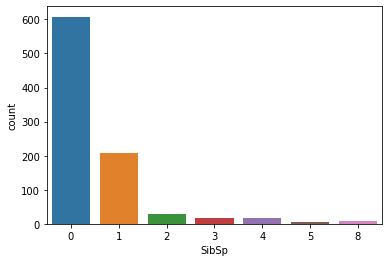

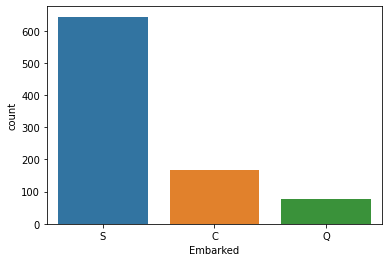

In [13]:
for i in columns:
    count_plot(i)

<AxesSubplot:ylabel='Frequency'>

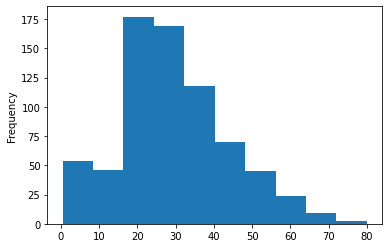

In [14]:
data["Age"].plot(kind='hist')

## **Data Pre-processing**

In [15]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

In [17]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
#data.dropna(inplace=True)

In [19]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [20]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [21]:
sex = pd.get_dummies(data["Sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
embark = pd.get_dummies(data["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
pclass = pd.get_dummies(data["Pclass"],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [24]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [25]:
data.drop(["Sex","Embarked","Pclass"],axis=1,inplace=True)

In [26]:
data.head(1)

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.25


In [27]:
data = pd.concat([data,sex,embark,pclass],axis=1)
data.columns = data.columns.astype(str)
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [28]:
data.dtypes

Survived      int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
male          uint8
Q             uint8
S             uint8
2             uint8
3             uint8
dtype: object

## **Training Model**

In [29]:
X = data.drop("Survived",axis=1)
Y = data["Survived"]

In [30]:
Y.shape

(891,)

In [31]:
np.unique(Y)

array([0, 1], dtype=int64)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

## **Training Multiple Classification Models**

### **1. Logistic Regression**

In [33]:
log_reg = LogisticRegression(max_iter=1000,C=0.1)
log_reg.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=1000)



#### **Testing accuracy of Logistic Regression**

In [34]:
log_reg.score(X_test,y_test)

0.8097014925373134

#### **Training Accuracy of Logistic Regression**

In [35]:
log_reg.score(X_train,y_train)

0.8186195826645265

#### **Confusion Matrix**

In [36]:
y_predict = log_reg.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[140,  17],
       [ 34,  77]], dtype=int64)

#### **Classification Report**

In [37]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.82      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



### **2. KNN Classifier**

In [38]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

#### **Testing Accuracy of KNN Classifier**

In [39]:
knn.score(X_test,y_test)

c:\Users\Vikas Jadaun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7052238805970149

#### **Training Accuracy of KNN Classifier**

In [40]:
knn.score(X_train,y_train)

c:\Users\Vikas Jadaun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7479935794542536

#### **Confusion Matrix**

In [41]:
y_predict = knn.predict(X_test)
confusion_matrix(y_test,y_predict)

c:\Users\Vikas Jadaun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[136,  21],
       [ 58,  53]], dtype=int64)

#### **Classification Report**

In [42]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77       157
           1       0.72      0.48      0.57       111

    accuracy                           0.71       268
   macro avg       0.71      0.67      0.67       268
weighted avg       0.71      0.71      0.69       268



### **3. Decision Tree Classifier**

In [43]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

#### **Training Accuracy of Decision Tree Classifier**



In [44]:
decision_tree.score(X_train,y_train)

0.9807383627608347

#### **Testing Accuracy of Decision Tree Classifier**

In [45]:
decision_tree.score(X_test,y_test)

0.7388059701492538

#### **Confusion Matrix**

In [46]:
y_predict = decision_tree.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[125,  32],
       [ 38,  73]], dtype=int64)

#### **Classification Report**

In [47]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       157
           1       0.70      0.66      0.68       111

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



### **4. Random Forest Classifier**

In [48]:
random_forest = RandomForestClassifier(n_estimators=13)
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=13)

#### **Training Accuracy of Random Forest Classifier**

In [49]:
random_forest.score(X_train,y_train)

0.9759229534510433

#### **Testing Accuracy of Random Forest Classifier**

In [50]:
random_forest.score(X_test,y_test)

0.8246268656716418

#### **Confusion Matrix**

In [51]:
y_predict = random_forest.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[138,  19],
       [ 28,  83]], dtype=int64)

#### **Classification Report**

In [52]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       157
           1       0.81      0.75      0.78       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.82      0.82      0.82       268



### **5. Gaussian Naive Bayes Classifier**

In [53]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

#### **Training Accuracy of Gaussian Naive Bayes Classifier**

In [54]:
naive_bayes.score(X_train,y_train)

0.8057784911717496

#### **Testing Accuracy of Gaussian Naive Bayes Classifier**

In [55]:
naive_bayes.score(X_test,y_test)

0.7835820895522388

#### **Confusion Matrix**

In [56]:
y_predict = naive_bayes.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[128,  29],
       [ 29,  82]], dtype=int64)

#### **Classification Report**

In [57]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       157
           1       0.74      0.74      0.74       111

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



### **6. SVM Classifier**

In [58]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

#### **Testing Accuracy of SVM Classifier**

In [59]:
svm.score(X_test,y_test)

0.664179104477612

#### **Training Accuracy of SVM Classifier**

In [60]:
svm.score(X_train,y_train)

0.6677367576243981

#### **Confusion Matrix**

In [61]:
y_predict = svm.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[149,   8],
       [ 82,  29]], dtype=int64)

#### **Classification Report**

In [62]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77       157
           1       0.78      0.26      0.39       111

    accuracy                           0.66       268
   macro avg       0.71      0.61      0.58       268
weighted avg       0.70      0.66      0.61       268

